In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.alarm_setting import AlarmSetting
from scripts.alarm_generator import *
# data_process = pd.read_csv("entrada.csv")
# alarm_var = pd.read_csv("alarm_list.csv")

In [2]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal

In [3]:
x_ = []
for i in np.arange(10):
    x_.append(step_signal(3,7))

In [4]:
for i in np.arange(10):
    if len(x_[0]) > len(x_[i]):
        if x_[i][-1] >= 2.8 and x_[i][-1] <= 3.2:
            x_[i] = np.concatenate((x_[i],np.random.uniform(3-0.2,3+0.2,len(x_[0])-len(x_[i]))))
        elif x_[i][-1] >= 6.7 and x_[i][-1] <= 7.3:
            x_[i] = np.concatenate((x_[i],np.random.uniform(7-0.3,7+0.3,len(x_[0])-len(x_[i]))))
    else:
        delete = np.nonzero(x_[i][len(x_[0]):])
        x_[i] = np.delete(x_[i],delete)
    
df = pd.DataFrame()
for i in np.arange(10):
    df['x'+str(i)] = x_[i]
    
tout = np.arange(0,len(x_[0])*.01,step=.01,dtype=float)    
df.index = pd.Index(tout, name='tout')

In [5]:
var_list = [
    AlarmSetting(5, 'high', 'x0', 100*3/len(x_[0]), 70*3/len(x_[0])),
    AlarmSetting(5, 'low', 'x1', 100*3/len(x_[0]), 70*3/len(x_[0])),
    AlarmSetting(4.5, 'high', 'x2', 100*3/len(x_[0]), 70*3/len(x_[0])),
    AlarmSetting(6, 'low', 'x3', 100*3/len(x_[0]), 70*3/len(x_[0]))
]

In [6]:
df_log = alarm_generate(df['x0'], var_list[0])

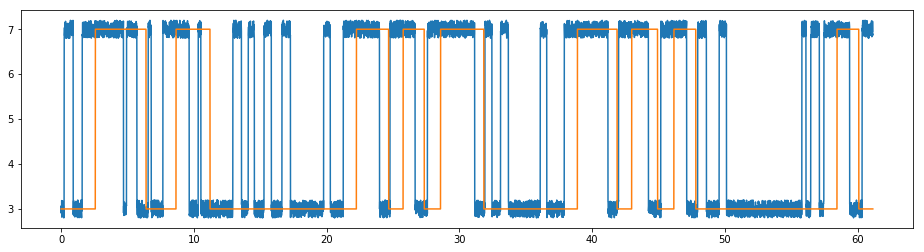

In [7]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])
plt.plot(df_log*4+3)

In [8]:
alm_seq_df = alarm_seq(df, var_list)

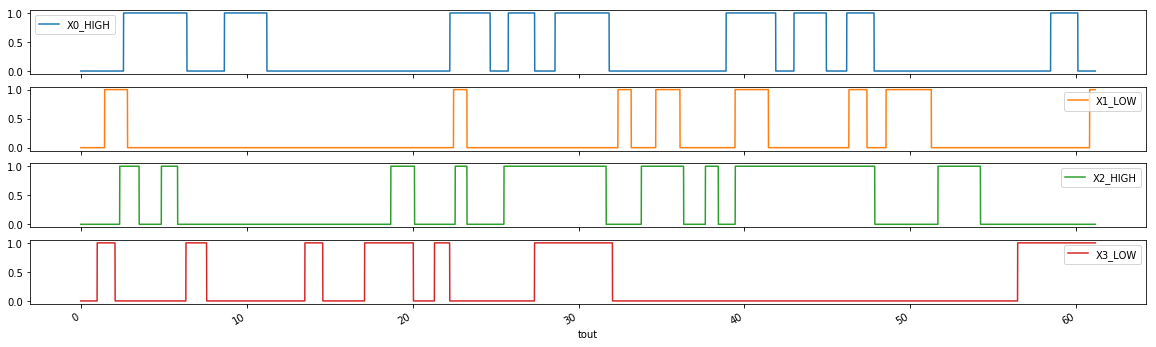

In [9]:
alm_seq_df.plot(subplots=True, figsize=(20,6))
plt.show()

In [10]:
log_df = alarm_log(alm_seq_df)
log_df.head()

,TAG,TAG_DESC,ALM,ALM_DESC,STATE
0.99,X3,X3,LOW,LOW,ALM
1.44,X1,X1,LOW,LOW,ALM
2.07,X3,X3,LOW,LOW,RTN
2.35,X2,X2,HIGH,HIGH,ALM
2.58,X0,X0,HIGH,HIGH,ALM
